<a href="https://colab.research.google.com/github/kghilothia06/customer_analysis/blob/master/CAR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Important Libraries import

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Exploring the 2 datasets

In [0]:
df1 = pd.read_excel('/content/Customers2.xlsx')
df2 = pd.read_excel('/content/Customers2_TimeSeries.xlsx')

In [58]:
df1.shape

(753, 12)

In [59]:
df2.shape

(6024, 4)

In [60]:
df1.head(10)

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes
5,6,10,1,0,1,0,English,USA,30.0,0.0,Yes,No
6,7,5,0,0,0,0,English,USA,10.0,0.0,No,No
7,8,1,0,0,0,0,English,USA,4.0,0.0,No,No
8,9,26,0,0,0,0,English,India,15.0,0.0,No,Yes
9,10,11,0,0,0,0,Spanish,Spain,15.0,0.0,Yes,Yes


In [61]:
df2.head(35)

,CustomerID,Date,Interaction,MadeAPurchase
0,1,2020-01-05,call_made,No
1,1,2020-01-06,call_received,No
2,1,2020-01-07,email_sent,No
3,1,2020-01-08,email_opened,No
4,1,2020-01-09,email_opened,No
5,1,2020-01-10,webinar_registered,No
6,1,2020-01-11,webinar_attended,No
7,1,2020-01-12,paper_downloaded,No
8,2,2020-01-13,call_received,No
9,2,2020-01-14,call_received,No


In [0]:
#checking for missing/null values
null_columns=df1.columns[df1.isnull().any()]
#taking care of null values
df1.fillna(0,inplace=True)

##Data Preprocessing

Label Encoding 'MadeAPurchase' , 'PriorClient' , 'Interaction' columns of both dataset

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['PriorClient'] = le.fit_transform(df1['PriorClient'])
df1['MadeAPurchase'] = le.fit_transform(df1['MadeAPurchase'])
df2['MadeAPurchase'] = le.fit_transform(df2['MadeAPurchase'])
df2['Interaction'] = le.fit_transform(df2['Interaction'])

Now we one hot encode 'Country' column

In [0]:
#first we create dummy variables
top = ['USA', 'China', 'Japan', 'France', 'Canada']
df1['Country'] = df1['Country'].apply(lambda x : 'Other' if x not in top else x)
df3 = pd.get_dummies(df1['Country'])

In [0]:
#merging df3 and df1
df1 = pd.concat([df1,df3],axis=1)

In [0]:
#we dont need 'Country' column anymore, hence we drop it
df1.drop(['Country'],axis=1,inplace=True)

adding a new column 'TotalInteractions' to the dataset 
that contains sum of the columns NumCalls, NumEmails, NumDownloads, NumEvents, and NumForms

In [0]:
df1['TotalInteractions'] = df1['NumCalls'] + df1['NumEmails'] + df1['NumDownloads'] + df1['NumEvents'] + df1['NumForms']

In [0]:
#rearranging the columns
mid = df1['TotalInteractions']
df1.drop(labels=['TotalInteractions'], axis=1, inplace = True)
df1.insert(6, 'TotalInteractions', mid)

##Preparing Training Set by combining both the datasets:
Plan of Action:
from df2 , we have sequence of interactions of a customer and
from df1 , we have his/her static info like 'Country', 'PriorClient' etc.
We will combine them as depicted in next few cells

In [0]:
# segments is a list where each row contains activities of a single customer
# labels is a list containing whether a purchase is made or not for each customer
N_time_steps = 8
step = 8
segments = []
labels = []
for i in range(0,len(df2)-1,step):
  xs = df2['Interaction'].values[i : i+N_time_steps]
  ys = df2['MadeAPurchase'].values[i]
  
  segments.append([xs])
  labels.append([ys])

In [70]:
labels = np.array(labels)
labels.shape

(753, 1)

In [71]:
reshaped_segments = np.array(segments).reshape(753,8,1)
reshaped_segments

array([[[0],
        [1],
        [3],
        ...,
        [6],
        [5],
        [4]],

       [[1],
        [1],
        [3],
        ...,
        [6],
        [5],
        [4]],

       [[1],
        [1],
        [3],
        ...,
        [6],
        [5],
        [4]],

       ...,

       [[2],
        [0],
        [5],
        ...,
        [2],
        [2],
        [6]],

       [[5],
        [4],
        [1],
        ...,
        [2],
        [2],
        [6]],

       [[5],
        [4],
        [1],
        ...,
        [2],
        [2],
        [6]]])

now we append the static info of each customer to his/her corresponding entry in reshaped_segments

In [72]:
X_temp = df1.iloc[:, [6,8,9,10,12,13,14,15,16,17]].values
X_temp.shape

(753, 10)

In [75]:
X_temp = np.repeat(X_temp[:, np.newaxis, :], 8, axis=1)
X_temp.shape

(753, 8, 10)

In [76]:
X_temp

array([[[54., 10.,  0., ...,  0.,  1.,  0.],
        [54., 10.,  0., ...,  0.,  1.,  0.],
        [54., 10.,  0., ...,  0.,  1.,  0.],
        ...,
        [54., 10.,  0., ...,  0.,  1.,  0.],
        [54., 10.,  0., ...,  0.,  1.,  0.],
        [54., 10.,  0., ...,  0.,  1.,  0.]],

       [[ 2., 61.,  0., ...,  0.,  0.,  1.],
        [ 2., 61.,  0., ...,  0.,  0.,  1.],
        [ 2., 61.,  0., ...,  0.,  0.,  1.],
        ...,
        [ 2., 61.,  0., ...,  0.,  0.,  1.],
        [ 2., 61.,  0., ...,  0.,  0.,  1.],
        [ 2., 61.,  0., ...,  0.,  0.,  1.]],

       [[12.,  1.,  0., ...,  0.,  1.,  0.],
        [12.,  1.,  0., ...,  0.,  1.,  0.],
        [12.,  1.,  0., ...,  0.,  1.,  0.],
        ...,
        [12.,  1.,  0., ...,  0.,  1.,  0.],
        [12.,  1.,  0., ...,  0.,  1.,  0.],
        [12.,  1.,  0., ...,  0.,  1.,  0.]],

       ...,

       [[15.,  0.,  0., ...,  0.,  1.,  0.],
        [15.,  0.,  0., ...,  0.,  1.,  0.],
        [15.,  0.,  0., ...,  0.,  1.,  0.

In [0]:
# now the first two axes of reshaped_segments and X_temp have the same shape
# append the values in reshaped_segments to X_temp along the last axis
# X is our training data
X = np.append(reshaped_segments, X_temp, axis=2)

##Model Building

We will build a LSTM network

In [83]:
import tensorflow.keras
from keras.layers import *
from keras.models import Sequential
import keras.backend as k

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(LSTM(64,input_shape=(8,11) , return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(32 , return_sequences=True ))
model.add(Dropout(0.25))
model.add(LSTM(32))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy'] )

In [127]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 8, 64)             19456     
_________________________________________________________________
dropout_32 (Dropout)         (None, 8, 64)             0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 8, 32)             12416     
_________________________________________________________________
dropout_33 (Dropout)         (None, 8, 32)             0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_34 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)               

In [128]:
epochs_hist = model.fit(X , labels  , batch_size=128 , epochs=15 , validation_split=0.2)


Train on 602 samples, validate on 151 samples
Epoch 1/15
602/602 [==============================] - 1s 2ms/step - loss: 0.2419 - accuracy: 0.5947 - val_loss: 0.2222 - val_accuracy: 0.6887
Epoch 2/15
602/602 [==============================] - 0s 231us/step - loss: 0.2185 - accuracy: 0.6711 - val_loss: 0.2098 - val_accuracy: 0.6887
Epoch 3/15
602/602 [==============================] - 0s 235us/step - loss: 0.2114 - accuracy: 0.6728 - val_loss: 0.2071 - val_accuracy: 0.6887
Epoch 4/15
602/602 [==============================] - 0s 228us/step - loss: 0.2085 - accuracy: 0.6744 - val_loss: 0.2066 - val_accuracy: 0.6954
Epoch 5/15
602/602 [==============================] - 0s 227us/step - loss: 0.2050 - accuracy: 0.6794 - val_loss: 0.2056 - val_accuracy: 0.6954
Epoch 6/15
602/602 [==============================] - 0s 231us/step - loss: 0.2029 - accuracy: 0.6777 - val_loss: 0.2063 - val_accuracy: 0.6821
Epoch 7/15
602/602 [==============================] - 0s 257us/step - loss: 0.2017 - accurac

Model Evaluation

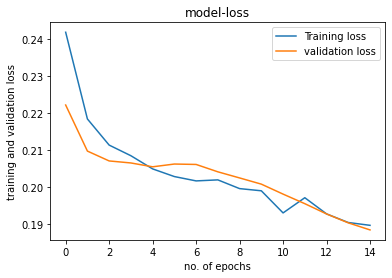

In [129]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('model-loss')
plt.ylabel('training and validation loss')
plt.xlabel('no. of epochs')
plt.legend(['Training loss' , 'validation loss'])
plt.show()